BerkeleyX: Data8.2x

Foundations of Data Science: Inferential Thinking by Resampling

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lec 5.2 A Model about Random Selection

In [2]:
# proportion of categories in the population - here, black vs white people
eligible_population = [0.26, 0.74]

# give these ratios, is a sample containing 8 blacks "normal"?

# Random sample from a categorical distribution using
#  datascience.sample_proportions(sample_size, probabilities)
#  (just a wrapper to np.random.multinomial(sample_size, probabilities) / sample_size)

sample_proportions(100, eligible_population)

array([0.3, 0.7])

In [3]:
# from percentage to units
both_counts = 100 * (sample_proportions(100, eligible_population))
both_counts, int(both_counts[0])

(array([25., 75.]), 25)

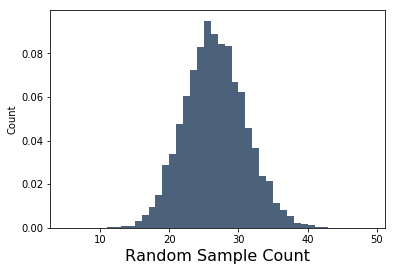

In [64]:
repetitions = 10000

counts = np.empty(repetitions)

for i in range(repetitions):
    sample_distribution = sample_proportions(100, eligible_population)
    counts[i] = int(round(100 * sample_distribution[0]))

Table().with_column('Random Sample Count', counts).hist(
    bins = range(5, 50), normed=None, density=True)

Lec 5.3 A Genetic Model

Gregor Mendel

In [21]:
# Model for a given pea plant: 75% flowers are purple, 25% white
# Is this model good? We'll check the statistic expected percentage against actual value
model = np.array([.75, .25])
prediction_purple = 75

sample_size = 929 # actual sample size by Mendel
proportion = np.random.multinomial(sample_size, model) / sample_size
percent_purple = 100 * proportion[0]
statistic = abs(percent_purple - prediction_purple)
statistic

1.0495156081808403

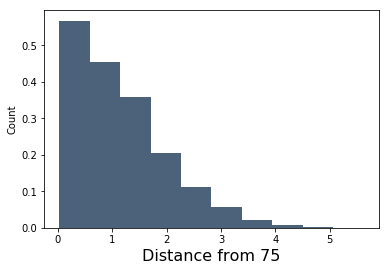

In [30]:
repetitions = 10000
distances = np.empty(repetitions)

for i in range(repetitions):
    distance = abs((100 * sample_proportions(sample_size, model)[0]) - 75)
    distances[i] = distance
    
Table().with_column('Distance from 75', distances).hist(normed=None, density=True)

In [32]:
# The result Mendel got was less than 1%, looks like a good fit
mendel_purple = 705
abs(100 * (mendel_purple / sample_size) - prediction_purple)

0.8880516684607045

Lec 5.4 Example

Data: 400 tosses of a coin

Hypotheses A: Coin is not fair

Hypotheses B: Coin is biased toward tails

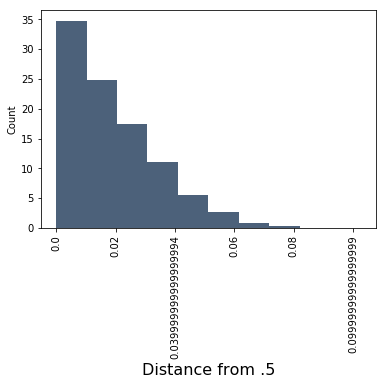

In [46]:
# A - fair: close to .5, unfair, far from it
model = np.array([.5, .5])
prediction_tail = .5
sample_size = 400

repetitions = 10_000
distances = np.empty(repetitions)

for i in range(repetitions):
    distances[i] = abs(sample_proportions(sample_size, model)[0] - .5)
    
Table().with_column('Distance from .5', distances).hist(normed=None, density=True)

# for instance, if actual value < .10, reject bias

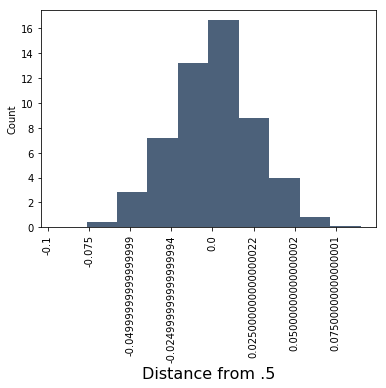

In [49]:
# B - fair: close to .5, unfair towards T, far from it on the right
for i in range(repetitions):
    distance = sample_proportions(sample_size, model)[0] - .5
    distances[i] = distance
    
Table().with_column('Distance from .5', distances).hist(normed=None, density=True)

# for instance, if actual value < .05, reject bias towards T

The Kristen Gilbert case

In [63]:
total_shifts = 1641
gilbert_shifts = 257
total_deaths = 74
gilbert_death_on_shift = 40

# If you picked a shift at random,
# what’s the chance there’s at least one death on that shift?
deadly_shift = total_deaths / total_shifts  # 74 / 1641
print(deadly_shift)

# Suppose Gilbert's shifts were like random draws from all 1641 shifts.
# How many draws would there be?
print(gilbert_shifts)  # 257

# If Gilbert's shifts were like random draws,
# in how many shifts do you expect her to have seen at least one death?
exp_deadly_shift = deadly_shift * gilbert_shifts # 257 * 74 / 1641
print(exp_deadly_shift)

# In how many of Gilbert's shifts did she see at least one death?
print(gilbert_death_on_shift) # 40

0.04509445460085314
1.0
11.589274832419257
40
